In [4]:
# conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0

In [5]:
# !pip install ftfy regex tqdm

In [6]:
# !pip install git+https://github.com/openai/CLIP.git

In [7]:
# !pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

In [1]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [101]:
model, preprocess = clip.load("ViT-B/32", device=device)

In [94]:
image = preprocess(Image.open('puppy.jpg')).unsqueeze(0).to(device)

In [103]:
image_li = [Image.open('puppy.jpg'), Image.open('cat.jpg'), Image.open('rabbit.jpg')]

image = []
for img in image_li:
    image.append(preprocess(img).unsqueeze(0).to(device))
    

In [105]:
len(image)

3

In [107]:
text = clip.tokenize(["a cat"]).to(device)

In [ ]:
with torch.no_grad():
    for 

In [108]:
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

AttributeError: 'list' object has no attribute 'type'

In [109]:
print("Label probs:", probs)

Label probs: [[0.00902 0.3386  0.6523 ]]


In [3]:
import os
import clip
import torch
from torchvision.datasets import CIFAR100

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# Download the dataset
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

Files already downloaded and verified


In [4]:
# Prepare the inputs

image, class_id = cifar100[144]
print(class_id)

24


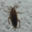

In [5]:
image

In [6]:
image_input = preprocess(image).unsqueeze(0).to(device)
image_input

tensor([[[[0.6165, 0.6165, 0.6165,  ..., 0.7041, 0.7041, 0.7041],
          [0.6165, 0.6165, 0.6165,  ..., 0.7041, 0.7041, 0.7041],
          [0.6165, 0.6165, 0.6165,  ..., 0.7041, 0.7041, 0.7041],
          ...,
          [0.3391, 0.3391, 0.3245,  ..., 0.3245, 0.3245, 0.3099],
          [0.3537, 0.3537, 0.3391,  ..., 0.3245, 0.3245, 0.3099],
          [0.3537, 0.3537, 0.3391,  ..., 0.3391, 0.3391, 0.3099]],

         [[0.7842, 0.7842, 0.7842,  ..., 0.9493, 0.9493, 0.9493],
          [0.7842, 0.7842, 0.7842,  ..., 0.9493, 0.9493, 0.9493],
          [0.7842, 0.7842, 0.7842,  ..., 0.9493, 0.9493, 0.9493],
          ...,
          [0.4991, 0.4991, 0.4841,  ..., 0.4991, 0.4991, 0.4991],
          [0.5141, 0.5141, 0.4991,  ..., 0.4991, 0.4991, 0.4991],
          [0.5141, 0.5141, 0.4991,  ..., 0.5141, 0.5141, 0.5141]],

         [[0.9088, 0.9088, 0.9088,  ..., 1.0367, 1.0367, 1.0367],
          [0.9088, 0.9088, 0.9088,  ..., 1.0367, 1.0367, 1.0367],
          [0.9088, 0.9088, 0.9088,  ..., 1

In [7]:
text_inputs = torch.cat([clip.tokenize(f'a photo of a {c}') for c in cifar100.classes]).to(device)
text_inputs

tensor([[49406,   320,  1125,  ...,     0,     0,     0],
        [49406,   320,  1125,  ...,     0,     0,     0],
        [49406,   320,  1125,  ...,     0,     0,     0],
        ...,
        [49406,   320,  1125,  ...,     0,     0,     0],
        [49406,   320,  1125,  ...,     0,     0,     0],
        [49406,   320,  1125,  ...,     0,     0,     0]], device='cuda:0',
       dtype=torch.int32)

In [8]:
# Caculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

In [9]:
# Pick the top 5 most similar labels for the image

image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

In [10]:
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

In [11]:
values, indices = similarity[0].topk(1)

In [12]:
# Print the result

print('|nTop predictions:|n')

for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")

|nTop predictions:|n
       cockroach: 49.90%


In [59]:
image_li = [Image.open('puppy.jpg'), Image.open('cat.jpg'), Image.open('rabbit.jpg')]

In [60]:
image = []
for img in image_li:
    image.append(preprocess(img).unsqueeze(0).to(device))

In [61]:
image_inputs = torch.cat(image)
text_input = clip.tokenize(["a dog"]).to(device)

In [63]:
with torch.no_grad():
    image_features = model.encode_image(image_inputs)
    text_features = model.encode_text(text_input)

In [65]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * text_features @ image_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(3)


In [87]:
for value, index in zip(values, indices):
    print(value)
    image_li[index]

tensor(0.9727, device='cuda:0', dtype=torch.float16)
tensor(0.0148, device='cuda:0', dtype=torch.float16)
tensor(0.0126, device='cuda:0', dtype=torch.float16)
